In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from random import random
from matplotlib import pyplot as plt
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.dates as mdates

# RU34 ECO-PAM Mission 1
url  = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20200729T1430-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-07-29T16%3A05%3A40Z&time%3C=2020-08-26T14%3A59%3A27Z' 
JUL_AUG_2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
JUL_AUG_2020 #= Stratified

#RU34 ECO-PAM Mission 2
url1  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201003T1821-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-03T18%3A21%3A59Z&time%3C=2020-11-05T16%3A39%3A00Z' 
OCT_NOV_2020 = pd.read_csv(url1, sep=',', skiprows=range(1, 2), parse_dates=['time'])
OCT_NOV_2020 #= Stratified #only stratified at depths greater than 30m-35m

#RU34 ECO-PAM Mission 3
url2  = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-19T16%3A41%3A01Z&time%3C=2020-12-21T15%3A51%3A16Z' 
NOV_DEC_2020 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time'])
NOV_DEC_2020 #= Mixed

#RU34 ECO-PAM Mission 4
url3  = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20210208T2055-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2021-02-08T20%3A55%3A15Z&time%3C=2021-03-08T18%3A59%3A11Z'
FEB_MAR_2021 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time'])
FEB_MAR_2021 #= Mixed

#RU34 ECO-PAM Mission 5
url4 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20211120T1900-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2021-11-20T19%3A29%3A11.00Z&time%3C=2021-12-17T19%3A27%3A15.00Z'
NOV_DEC_2021 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time'])
NOV_DEC_2021 #= Mixed

#RU34 ECO-PAM Mission 6
url5 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20220113T1949-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vemco%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2022-01-13T19%3A53%3A10.62Z&time%3C=2022-02-11T15%3A07%3A38.47Z'
JAN_FEB_2022 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time']) 
JAN_FEB_2022 #= Mixed

#RU34 ECO-PAM Mission 7
url6 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20220215T1926-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vemco%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2022-02-15T19%3A26%3A12.07Z&time%3C=2022-03-16T12%3A36%3A47.85Z'
FEB_MAR_2022 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time']) 
FEB_MAR_2022 #= Mixed

#RU34 ECO-PAM Mission 8
url7 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20220330T1435-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vemco%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-03-30T14%3A36%3A23.16Z&time%3C=2022-04-22T15%3A19%3A48.74Z'
MAR_APR_2022 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time']) 
MAR_APR_2022 #= Mixed #End of mission catches beginning of stratification

#RU34 ECO-PAM Mission 9
url8 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20220520T1538-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vemco%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-05-20T15%3A39%3A51.00Z&time%3C=2022-06-10T14%3A37%3A34.55Z'
MAY_JUN_2022 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time']) 
MAY_JUN_2022 #= Stratified

# RU28 NJDEP RMI Mission 1 
url9 = 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20220906T1535-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_vemco%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Coxygen_saturation%2Coxygen_saturation_optimal_shift%2Coxygen_saturation_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_ctd41cp_is_installed%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-09-06T15%3A37%3A17.22Z&time%3C=2022-10-11T17%3A05%3A51.99Z'
SEP_OCT_2022 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time']) 
SEP_OCT_2022 #= Stratified # Catches mixing at end of deployment


# List of file paths fot tag qualified tag detections (ECO-PAM missions from 2020, 2021, & 2022, and NJDEP Mission from 2022)
file_paths = [  'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2022/ecopam_qualified_detections_2022.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2021/ecopam_qualified_detections_2021.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2020/ecopam_qualified_detections_2020.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/rmigliders_qualified_detections_2022/rmigliders_qualified_detections_2022.csv']

# Initialize an empty list to store DataFrames
all_detections = []

# Loop through each file path
for file_path in file_paths:
    # Read CSV file into DataFrame
    detection_data = pd.read_csv(file_path)
    # Convert 'datecollected' column to datetime
    detection_data['datecollected'] = pd.to_datetime(detection_data['datecollected'])
    
    # Append the DataFrame to the list
    all_detections.append(detection_data)

# Concatenate all DataFrames in the list into a single DataFrame
combined_detection_data = pd.concat(all_detections, ignore_index=True)

#Grabs the unique dates when a detection occured
unique_dates = combined_detection_data['datecollected'].dt.date.unique()

# empty column for water mass 
combined_detection_data['WM'] = np.nan
# empty column for nearest water front gradient with a strength score above 1.5
combined_detection_data['WG'] = np.nan
# empty column for strongest graident within 1km of detection
combined_detection_data['WG_1km'] = np.nan
# empty column for strongest gradient within 5km of detection
combined_detection_data['WG_5km'] = np.nan
# empty column for Distance from detection to the nearest water front gradient with a strength score above 1.5
combined_detection_data['WG_Dist'] = np.nan
# empty column for Species names for each Tag ID
combined_detection_data['Species'] = np.nan


# Read in the Tag Biometric Data
CSV = 'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Master Tag Information Log 1.csv'
# skip first row
Species = pd.read_csv(CSV, sep=',', skiprows=range(1, 1))

# Populate Species column based on tag ID's (fieldnumber in detection data)
combined_detection_data = pd.merge(combined_detection_data, Species[['Tag ID', 'Species']], 
                                    how='left', left_on='fieldnumber', right_on='Tag ID')

# Drop the redundant 'Tag ID' column
combined_detection_data.drop(columns='Tag ID', inplace=True)


# open satellite dataset from Thredds / Date range is from 12/31/2020 - 10/22/22 (Products stop being created past 10/22/2022)
# the full list of thredds datasets is here: http://basin.ceoe.udel.edu/thredds/catalog/catalog.html
satdata = xr.open_dataset('http://basin.ceoe.udel.edu/thredds/dodsC/Aqua1DayAggregate.nc')
# subset to domain based on range of detections
# you can change these to discrete lon & lat values if you want to set a specific domain rather than base it off of the detections coverage
satdata = satdata.sel(lon = slice(np.min(combined_detection_data['longitude'])-0.5, np.max(combined_detection_data['longitude'])+0.5), lat = slice(np.min(combined_detection_data['latitude'])-0.5, np.max(combined_detection_data['latitude'])+0.5))
# generate 2d lon and lag grid (for calculating distance)
satgrid = np.meshgrid(satdata['lon'], satdata['lat'])

# define equation to get distance (km) from one lon/lat to another (or an entire set)
def haversine_dist(blon,blat,slon,slat):
    # blon: longitude of single point
    # blat: latitude of single point
    # slon: longitude(s) of grid
    # slat: latitude(s) of grid
    R = 6373.0
    blon=blon*np.pi/180
    blat=blat*np.pi/180
    slon=slon*np.pi/180
    slat=slat*np.pi/180
    dlon=slon-blon
    dlat=slat-blat
    a=np.sin(dlat/2)**2+np.cos(blat)*np.cos(slat)*np.sin(dlon/2)**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    distance=R*c
    return distance

# initialize domain-based background conditions for water mass and frontal gradient
wmdomain=np.array(None)
wgdomain=np.array(None)

# loop through unique dates
for t in unique_dates:
    # find matching time in satellite data
    ti = np.logical_and(satdata['time'].data>=np.datetime64(t), satdata['time'].data<=np.datetime64(t)+np.timedelta64(1,'D'))
    # only continue if there is one (and only one) matching date in satellite data
    if np.sum(ti)==1:
        # grab water mass layer
        wm = np.squeeze(satdata['M_WK'][np.where(ti)[0],:,:].data)
        # grab frontal gradient layer
        wg = np.squeeze(satdata['M_WK_G'][np.where(ti)[0],:,:].data)
        # loop through detections on date t from all combined detections
        for detection in np.where(combined_detection_data['datecollected'].dt.date == t)[0]:
            # calculate distance from detection location to satellite grid points
            d = haversine_dist(combined_detection_data['longitude'][detection], combined_detection_data['latitude'][detection], satgrid[0], satgrid[1])
            # grab water mass classifications within 1km
            wm_close = wm[d <= 1]
            # grab frontal gradients within 1km
            wg_close = wg[d <= 1]
            # grab frontal gradients within 5km
            wg_close2 = wg[d <= 5]
            # grab maximum gradient within 1km and assign to dataframe
            combined_detection_data.loc[detection, 'WG_1km'] = np.max(wg_close)
            # grab maximum gradient within 5km and assign to dataframe
            combined_detection_data.loc[detection, 'WG_5km'] = np.max(wg_close2)
            # grab most common water mass category within 1km and assign to dataframe
            combined_detection_data.loc[detection, 'WM'] = stats.mode(wm_close, keepdims=False).mode
           # Filter out points where WG is above 1.5
            wg_above_threshold = wg > 1.5
            # Find indices of all points above threshold
            above_threshold_indices = np.where(wg_above_threshold)
            # Check if any points are above threshold
            if len(above_threshold_indices[0]) > 0:
                # Calculate distances to all points above threshold
                distances_to_above_threshold = d[wg_above_threshold]
                # Find the index of the minimum distance to a point above threshold
                min_dist_index = np.argmin(distances_to_above_threshold)
                # Assign the value and distance of the nearest frontal gradient above threshold to the DataFrame
                combined_detection_data.at[detection, 'WG'] = wg[above_threshold_indices[0][min_dist_index], above_threshold_indices[1][min_dist_index]]
                combined_detection_data.at[detection, 'WG_Dist'] = distances_to_above_threshold[min_dist_index]

# Group by 'WM', 'datecollected', and 'fieldnumber'
grouped = combined_detection_data.groupby(['WM', 'datecollected', 'fieldnumber'])

# Use transform to assign the first 'lat' and 'lon' of each group to new columns
combined_detection_data['first_lat'] = grouped['latitude'].transform('first')
combined_detection_data['first_lon'] = grouped['longitude'].transform('first')

# Change to Date only format
combined_detection_data['datecollected'] = pd.to_datetime(combined_detection_data['datecollected']).dt.date
# Create MultiIndex by  'WM', 'datecollected', and 'fieldnumber'
combined_detection_data.set_index(['WM', 'datecollected', 'fieldnumber'], inplace=True)
# Sort the index
combined_detection_data.sort_index(inplace=True)

def assign_first_lat_lon_to_indexed_df(df):
    # New DataFrame to hold the result
    result_df = df.copy()
    
    # Initialize columns for first_lat and first_lon
    result_df['first_lat'] = np.nan
    result_df['first_lon'] = np.nan
    
    # Iterate through each unique combination in the MultiIndex
    for index, group in df.groupby(level=['WM', 'datecollected', 'fieldnumber']):
        # Assign first lat and lon for each group
        first_row = group.iloc[0]  # First row of the group
        result_df.loc[group.index, 'first_lat'] = first_row['latitude']
        result_df.loc[group.index, 'first_lon'] = first_row['longitude']
    
    return result_df

# Apply the function
combined_detection_data = assign_first_lat_lon_to_indexed_df(combined_detection_data)
# Grab first occurance of each group then reset the Multi Index
grouped_data = combined_detection_data.groupby(['WM', 'datecollected', 'fieldnumber']).first().reset_index()
# Reset the index again ()
combined_detection_data.reset_index(inplace=True)

# Drop rows where 'WM' column has NaN values
combined_detection_data = combined_detection_data.dropna(subset=['WM'])

# If you need to re-index by 'WM', 'datecollected', and 'fieldnumber'
combined_detection_data.set_index(['WM', 'datecollected', 'fieldnumber'], inplace=True)

# Reset the index to work with 'WM', 'datecollected', and 'fieldnumber' as columns
combined_detection_data.reset_index(inplace=True)

# Use duplicated to mark duplicates in 'fieldnumber' within each group of 'WM' and 'datecollected'
duplicates = combined_detection_data.duplicated(subset=['WM', 'datecollected', 'fieldnumber'], keep='first')

# Drop the duplicates
combined_detection_data = combined_detection_data[~duplicates]

# Optionally, set the index back to 'WM', 'datecollected', and 'fieldnumber'
combined_detection_data.set_index(['WM', 'datecollected', 'fieldnumber'], inplace=True)

# Drop the redundant 'species_x' column
combined_detection_data.drop(columns=['Species_x'], inplace=True)

# Rename the 'species_y' column to 'Species'
combined_detection_data.rename(columns={'Species_y': 'Species'}, inplace=True)

# Add a new column "Strength_Score" by dividing "WG" by "WG_Dist"
combined_detection_data['Strength_Score'] = combined_detection_data['WG'] / combined_detection_data['WG_Dist']



In [2]:
combined_detection_data

basisofrecord institutioncode  \
WM    datecollected fieldnumber                                          
43.0  2020-11-20    A69-9002-6773   MachineObservation       RU-Marine   
51.0  2020-12-10    A69-1602-20938  MachineObservation       RU-Marine   
                    A69-1602-20952  MachineObservation       RU-Marine   
                    A69-1602-20954  MachineObservation       RU-Marine   
                    A69-9001-17812  MachineObservation       RU-Marine   
                    A69-9001-21793  MachineObservation       RU-Marine   
                    A69-9001-21830  MachineObservation       RU-Marine   
      2022-01-30    A69-1602-49608  MachineObservation       RU-Marine   
69.0  2020-10-06    A69-9001-21820  MachineObservation       RU-Marine   
72.0  2020-10-08    A69-9001-13443  MachineObservation       RU-Marine   
      2020-10-22    A69-9001-12730  MachineObservation       RU-Marine   
      2020-10-24    A69-9001-6464   MachineObservation       RU-Marine   
      2020-12-11    A69-9001-18629  MachineObservation       RU-Marine   
307.0 2020-08-18    A69-9001-23325  MachineObservation       RU-Marine   
      2022-09-09    A69-9001-64170  MachineObservation       RU-Marine   
412.0 2022-03-04    A69-9001-23978  MachineObservation       RU-Marine   
418.0 2022-03-04    A69-9001-23978  MachineObservation       RU-Marine   
451.0 2022-06-02    A69-9001-12078  MachineObservation       RU-Marine   
                    A69-9001-5324   MachineObservation       RU-Marine   
455.0 2020-12-18    A69-9001-23922  MachineObservation       RU-Marine   
      2022-06-02    A69-9001-12078  MachineObservation       RU-Marine   
                    A69-9001-5324   MachineObservation       RU-Marine   

                                   collectioncode datelastmodified timezone  \
WM    datecollected fieldnumber                                               
43.0  2020-11-20    A69-9002-6773          ECOPAM       2021-04-13      UTC   
51.0  2020-12-10    A69-1602-20938         ECOPAM       2021-04-13      UTC   
                    A69-1602-20952         ECOPAM       2021-04-13      UTC   
                    A69-1602-20954         ECOPAM       2021-04-13      UTC   
                    A69-9001-17812         ECOPAM       2021-04-13      UTC   
                    A69-9001-21793         ECOPAM       2021-04-13      UTC   
                    A69-9001-21830         ECOPAM       2021-04-13      UTC   
      2022-01-30    A69-1602-49608         ECOPAM       10/19/2022      UTC   
69.0  2020-10-06    A69-9001-21820         ECOPAM       2021-04-13      UTC   
72.0  2020-10-08    A69-9001-13443         ECOPAM       2021-07-14      UTC   
      2020-10-22    A69-9001-12730         ECOPAM       2022-10-24      UTC   
      2020-10-24    A69-9001-6464          ECOPAM       2021-07-14      UTC   
      2020-12-11    A69-9001-18629         ECOPAM       2021-11-10      UTC   
307.0 2020-08-18    A69-9001-23325         ECOPAM       2021-04-13      UTC   
      2022-09-09    A69-9001-64170     RMIGLIDERS       2023-02-15      UTC   
412.0 2022-03-04    A69-9001-23978         ECOPAM        11/2/2023      UTC   
418.0 2022-03-04    A69-9001-23978         ECOPAM        11/2/2023      UTC   
451.0 2022-06-02    A69-9001-12078         ECOPAM       10/24/2022      UTC   
                    A69-9001-5324          ECOPAM       10/24/2022      UTC   
455.0 2020-12-18    A69-9001-23922         ECOPAM       2021-07-14      UTC   
      2022-06-02    A69-9001-12078         ECOPAM       10/24/2022      UTC   
                    A69-9001-5324          ECOPAM       10/24/2022      UTC   

                                      trackercode        catalognumber  \
WM    datecollected fieldnumber                                          
43.0  2020-11-20    A69-9002-6773           MDWEA   A69-9002-6773-1750   
51.0  2020-12-10    A69-1602-20938        DEARRAY  A69-1602-20938-2043   
                    A69-1602-20952        DEARRAY  A69-1602-20952-2034 

In [17]:
import pandas as pd

# Had to manually create a small dataset to assign each detection a mission name and then Stratification based on start and end dates of the missions
missions = pd.DataFrame({
    'Mission': ['JUL_AUG_2020', 'OCT_NOV_2020', 'NOV_DEC_2020', 'FEB_MAR_2021', 'NOV_DEC_2021', 'JAN_FEB_2022', 'FEB_MAR_2022',
                'MAR_APR_2022', 'MAY_JUN_2022', 'SEP_OCT_2022'],
    'Start_Date': ['2020-07-29', '2020-10-03', '2020-11-19', '2021-02-08', '2021-11-20', '2022-01-13', '2022-02-15', '2022-03-30',
                   '2022-05-20', '2022-09-06'],
    'End_Date': ['2020-08-26', '2020-11-05', '2020-12-21', '2021-03-10', '2021-12-21', '2022-02-11', '2022-03-16', '2022-04-22',
                 '2022-06-10', '2022-10-11'],
    'Classification': ['Stratified', 'Stratified', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Stratified', 'Stratified']
})
# Change missions to data time format
missions['Start_Date'] = pd.to_datetime(missions['Start_Date'])
missions['End_Date'] = pd.to_datetime(missions['End_Date'])

# Reset index to un-index the dataset
combined_detection_data.reset_index(inplace=True)

# Add columns for Mission and Water_Column
combined_detection_data['Mission'] = ""
combined_detection_data['Water_Column'] = ""

# Loop through unique dates in the datecollected column
for date in combined_detection_data['datecollected'].unique():
    mission_found = False
    date = pd.Timestamp(date)  # Ensure date is a Timestamp object
    for _, mission_row in missions.iterrows():
        # Handle NaNs in Start_Date or End_Date
        if pd.notna(mission_row['Start_Date']) and pd.notna(mission_row['End_Date']):
            # If datecollected falls within date range of a mission assign it mission mission name and Stratification
            if mission_row['Start_Date'] <= date <= mission_row['End_Date']:
                mission = mission_row['Mission']
                water_column = mission_row['Classification']
                combined_detection_data.loc[combined_detection_data['datecollected'] == date, 'Mission'] = mission
                combined_detection_data.loc[combined_detection_data['datecollected'] == date, 'Water_Column'] = water_column
                mission_found = True
                break
    # Skip adding None values if mission not found
    if not mission_found:
        continue

# Re-index the DataFrame
combined_detection_data.set_index(['WM', 'datecollected', 'fieldnumber'], inplace=True)

# Print the updated DataFrame
combined_detection_data



basisofrecord institutioncode  \
WM    datecollected fieldnumber                                          
43.0  2020-11-20    A69-9002-6773   MachineObservation       RU-Marine   
51.0  2020-12-10    A69-1602-20938  MachineObservation       RU-Marine   
                    A69-1602-20952  MachineObservation       RU-Marine   
                    A69-1602-20954  MachineObservation       RU-Marine   
                    A69-9001-17812  MachineObservation       RU-Marine   
                    A69-9001-21793  MachineObservation       RU-Marine   
                    A69-9001-21830  MachineObservation       RU-Marine   
      2022-01-30    A69-1602-49608  MachineObservation       RU-Marine   
69.0  2020-10-06    A69-9001-21820  MachineObservation       RU-Marine   
72.0  2020-10-08    A69-9001-13443  MachineObservation       RU-Marine   
      2020-10-22    A69-9001-12730  MachineObservation       RU-Marine   
      2020-10-24    A69-9001-6464   MachineObservation       RU-Marine   
      2020-12-11    A69-9001-18629  MachineObservation       RU-Marine   
307.0 2020-08-18    A69-9001-23325  MachineObservation       RU-Marine   
      2022-09-09    A69-9001-64170  MachineObservation       RU-Marine   
412.0 2022-03-04    A69-9001-23978  MachineObservation       RU-Marine   
418.0 2022-03-04    A69-9001-23978  MachineObservation       RU-Marine   
451.0 2022-06-02    A69-9001-12078  MachineObservation       RU-Marine   
                    A69-9001-5324   MachineObservation       RU-Marine   
455.0 2020-12-18    A69-9001-23922  MachineObservation       RU-Marine   
      2022-06-02    A69-9001-12078  MachineObservation       RU-Marine   
                    A69-9001-5324   MachineObservation       RU-Marine   

                                   collectioncode datelastmodified timezone  \
WM    datecollected fieldnumber                                               
43.0  2020-11-20    A69-9002-6773          ECOPAM       2021-04-13      UTC   
51.0  2020-12-10    A69-1602-20938         ECOPAM       2021-04-13      UTC   
                    A69-1602-20952         ECOPAM       2021-04-13      UTC   
                    A69-1602-20954         ECOPAM       2021-04-13      UTC   
                    A69-9001-17812         ECOPAM       2021-04-13      UTC   
                    A69-9001-21793         ECOPAM       2021-04-13      UTC   
                    A69-9001-21830         ECOPAM       2021-04-13      UTC   
      2022-01-30    A69-1602-49608         ECOPAM       10/19/2022      UTC   
69.0  2020-10-06    A69-9001-21820         ECOPAM       2021-04-13      UTC   
72.0  2020-10-08    A69-9001-13443         ECOPAM       2021-07-14      UTC   
      2020-10-22    A69-9001-12730         ECOPAM       2022-10-24      UTC   
      2020-10-24    A69-9001-6464          ECOPAM       2021-07-14      UTC   
      2020-12-11    A69-9001-18629         ECOPAM       2021-11-10      UTC   
307.0 2020-08-18    A69-9001-23325         ECOPAM       2021-04-13      UTC   
      2022-09-09    A69-9001-64170     RMIGLIDERS       2023-02-15      UTC   
412.0 2022-03-04    A69-9001-23978         ECOPAM        11/2/2023      UTC   
418.0 2022-03-04    A69-9001-23978         ECOPAM        11/2/2023      UTC   
451.0 2022-06-02    A69-9001-12078         ECOPAM       10/24/2022      UTC   
                    A69-9001-5324          ECOPAM       10/24/2022      UTC   
455.0 2020-12-18    A69-9001-23922         ECOPAM       2021-07-14      UTC   
      2022-06-02    A69-9001-12078         ECOPAM       10/24/2022      UTC   
                    A69-9001-5324          ECOPAM       10/24/2022      UTC   

                                      trackercode        catalognumber  \
WM    datecollected fieldnumber                                          
43.0  2020-11-20    A69-9002-6773           MDWEA   A69-9002-6773-1750   
51.0  2020-12-10    A69-1602-20938        DEARRAY  A69-1602-20938-2043   
                    A69-1602-20952        DEARRAY  A69-1602-20952-2034 

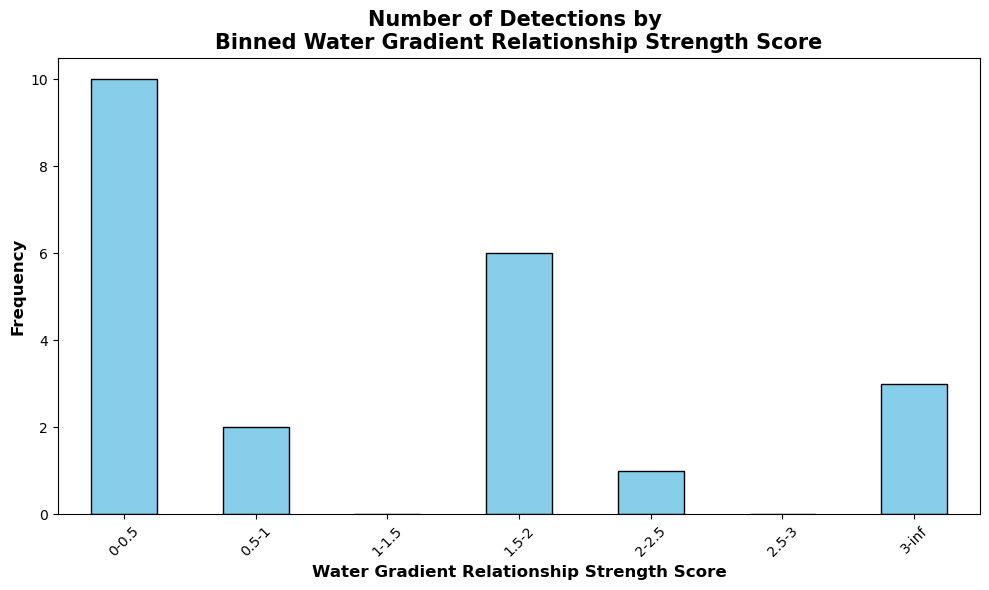

In [6]:
# Un-Do Index
combined_detection_data_reset = combined_detection_data.reset_index()

# Set Up Bins for water gradient Relationship Strength Score
bin_edges = [0, 0.5, 1, 1.5, 2, 2.5, 3, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

#Get count of detections for the relationship strength score bins
bin_counts = combined_detection_data_reset['WG_Strength_Score_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))  
# Create a histogram for the counts of detections within binned relationship strength scores (Higher value = stronger relationship/correlation)
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score', fontsize=15, fontweight='bold')
plt.xlabel('Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections by Binned Water Gradient Relationship Strength Score.png', dpi=300, bbox_inches='tight')
plt.show()


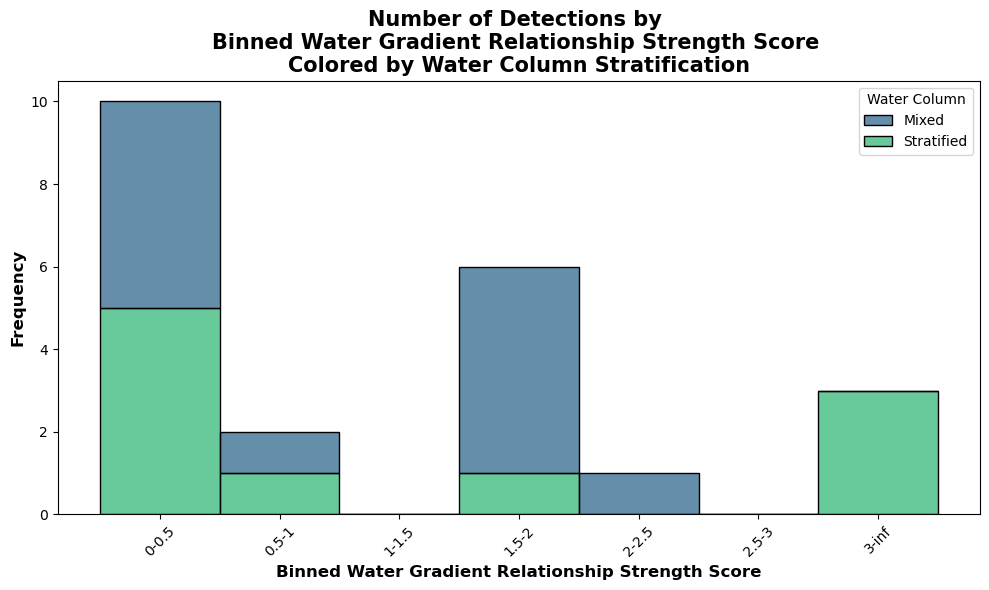

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up Bins for water gradient Relationship Strength Score
bin_edges = [0, 0.5, 1, 1.5, 2, 2.5, 3, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))  
# Create Same figure above but color by water stratification
sns.histplot(data=combined_detection_data_reset, x='WG_Strength_Score_bins', hue='Water_Column', multiple='stack', palette='viridis', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score \nColored by Water Column Stratification', fontsize=15, fontweight='bold')
plt.xlabel('Binned Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.gca().get_legend().set_title('Water Column')
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections by Binned Water Gradient Relationship Strength Score Colored by Water Column.png', dpi=300, bbox_inches='tight')
plt.show()



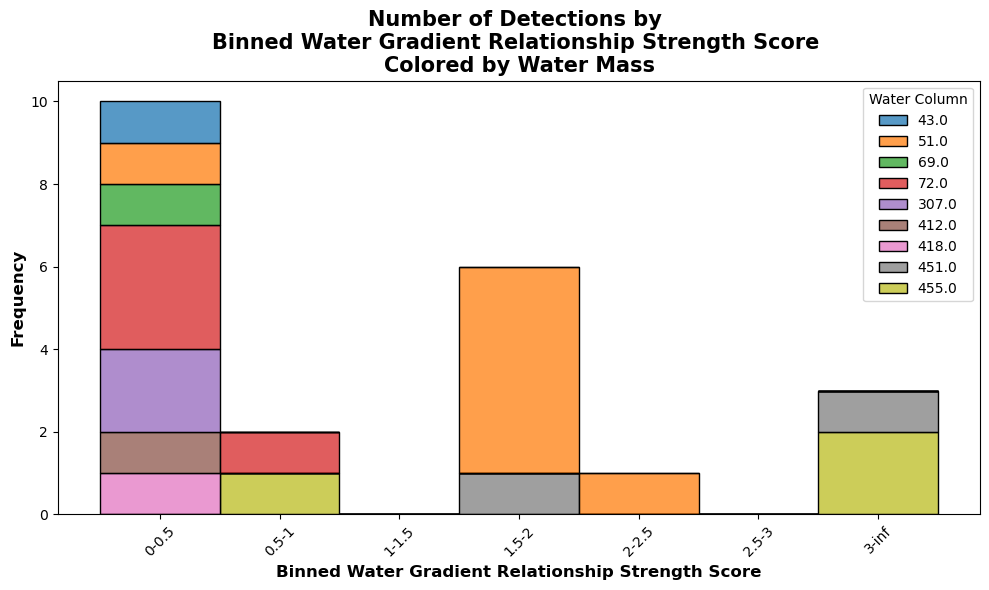

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up Bins for water gradient Relationship Strength Score
bin_edges = [0, 0.5, 1, 1.5, 2, 2.5, 3, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))  
# Create same figure as the two above but color by water mass 
sns.histplot(data=combined_detection_data_reset, x='WG_Strength_Score_bins', hue='WM', multiple='stack', palette='tab10', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score \nColored by Water Mass', fontsize=15, fontweight='bold')
plt.xlabel('Binned Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.gca().get_legend().set_title('Water Column')
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections by Binned Water Gradient Relationship Strength Score Colored by Water Mass.png', dpi=300, bbox_inches='tight')
plt.show()

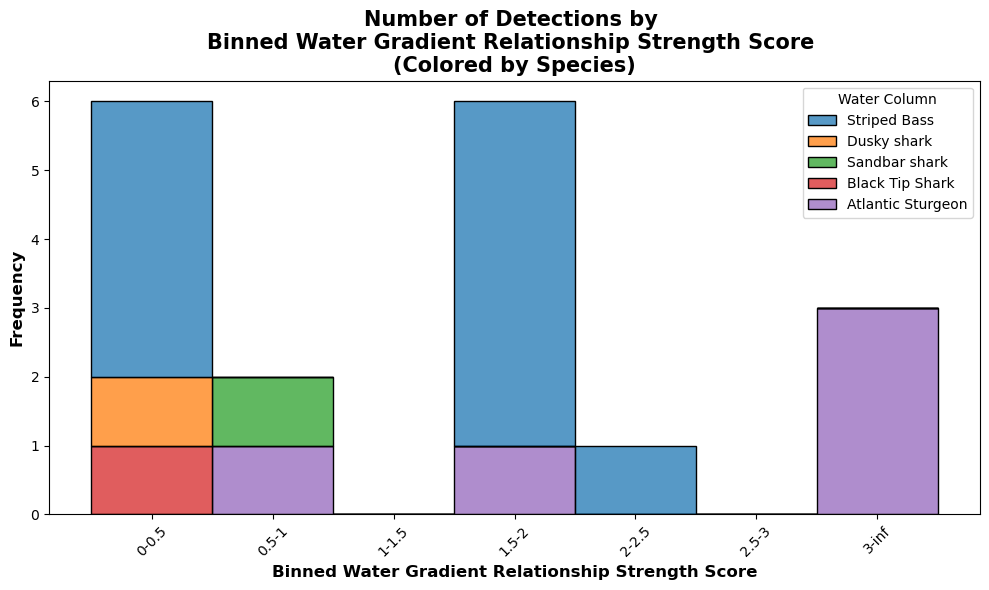

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up Bins for water gradient Relationship Strength Score
bin_edges = [0, 0.5, 1, 1.5, 2, 2.5, 3, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))  
# Similar to figures above, Create a histogram for the counts of detections within binned relationship strength scores Colored by Species (Excludes data where no species are known for a Tag ID)
sns.histplot(data=combined_detection_data_reset, x='WG_Strength_Score_bins', hue='Species', multiple='stack', palette='tab10', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score \n(Colored by Species)', fontsize=15, fontweight='bold')
plt.xlabel('Binned Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.gca().get_legend().set_title('Water Column')
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections by Binned Water Gradient Relationship Strength Score Colored by Species.png', dpi=300, bbox_inches='tight')
plt.show()

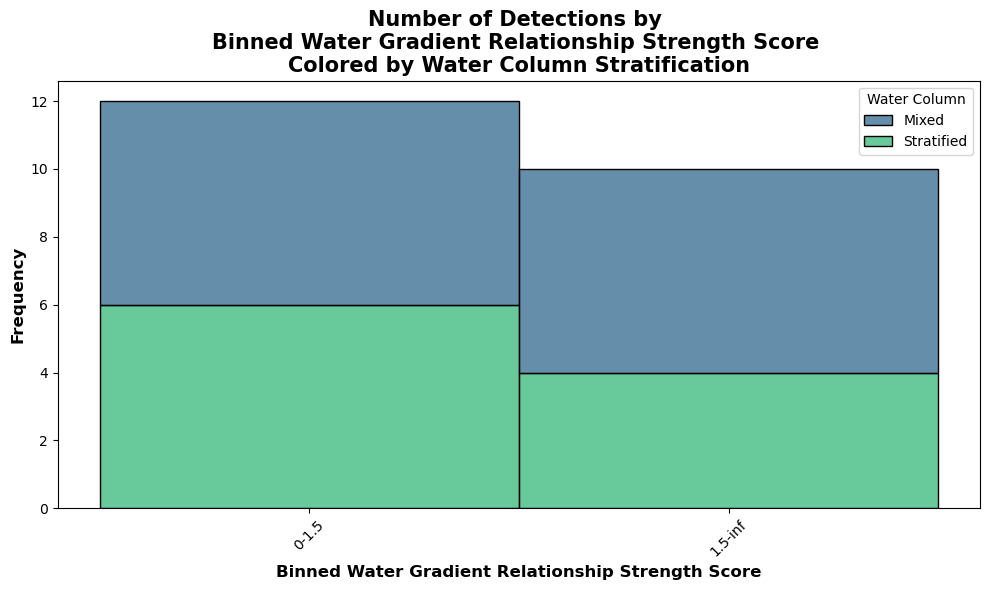

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up Bins for water gradient Relationship Strength Score (need to adjust the median value to be better representative of the data)
bin_edges = [0, 1.5, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))  
# Create a stacked histogram showing the counts of detections with relationship strength scores in each bin Colored by water column stratification
sns.histplot(data=combined_detection_data_reset, x='WG_Strength_Score_bins', hue='Water_Column', multiple='stack', palette='viridis', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score \nColored by Water Column Stratification', fontsize=15, fontweight='bold')
plt.xlabel('Binned Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.gca().get_legend().set_title('Water Column')
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/ThresholdNumber of Detections by Binned Water Gradient Relationship Strength Score Colored by Water Column.png', dpi=300, bbox_inches='tight')
plt.show()



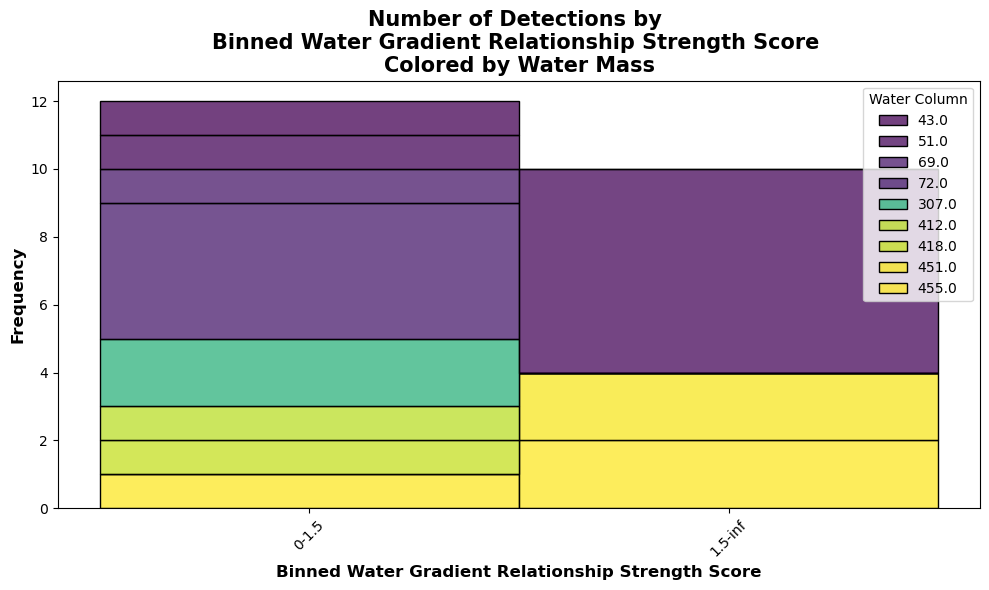

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up Bins for water gradient Relationship Strength Score (need to adjust the median value to be better representative of the data)
bin_edges = [0, 1.5, np.inf]
bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' if i < len(bin_edges) - 1 else f'{bin_edges[i]}+' for i in range(len(bin_edges) - 1)]
combined_detection_data_reset['WG_Strength_Score_bins'] = pd.cut(combined_detection_data_reset['Strength_Score'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))  
# Same figure as above colored by water mass
sns.histplot(data=combined_detection_data_reset, x='WG_Strength_Score_bins', hue='WM', multiple='stack', palette='viridis', edgecolor='black')
plt.title('Number of Detections by \nBinned Water Gradient Relationship Strength Score \nColored by Water Mass', fontsize=15, fontweight='bold')
plt.xlabel('Binned Water Gradient Relationship Strength Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.gca().get_legend().set_title('Water Column')
plt.tight_layout() 
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/ThresholdNumber of Detections by Binned Water Gradient Relationship Strength Score Colored by Water Mass.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

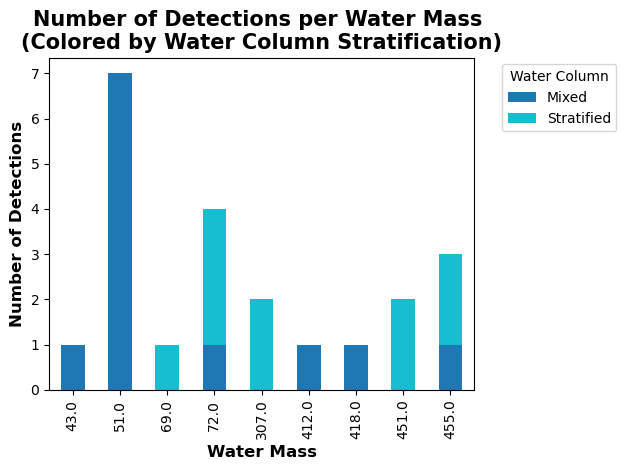

In [12]:
# Counts occurrences of data for each combination of 'Water_Column' and 'WM'
# organizing the results into a table where rows represent 'Water_Column' and columns represent 'WM' categories
counts = combined_detection_data_reset.groupby(['Water_Column', 'WM']).size().unstack(fill_value=0)
# Transpose 
counts = counts.T

plt.figure(figsize=(10, 6))
# Create a stacked histogram showing counts of detctions per water mass and colored by whether the waer column was stratified or unstratified at the time of detection
counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Number of Detections per Water Mass \n(Colored by Water Column Stratification)', fontsize=15, fontweight='bold')
plt.xlabel('Water Mass', fontsize=12, fontweight='bold')
plt.ylabel('Number of Detections', fontsize=12, fontweight='bold')
plt.legend(title='Water Column', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections per Water Mass (Colored by Water Column Stratification).png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1000x600 with 0 Axes>

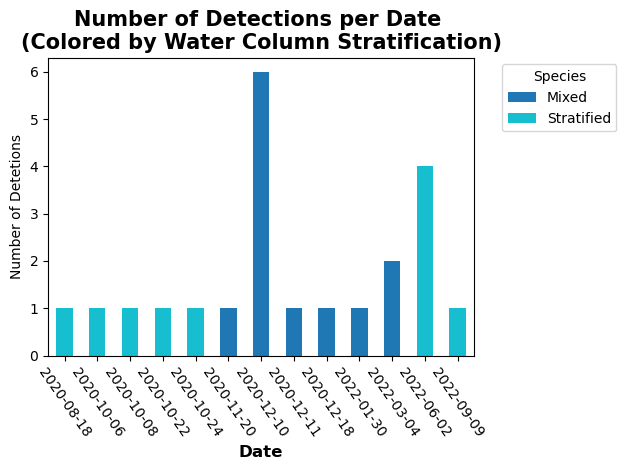

In [13]:
# Counts occurrences of data for each combination of 'Water_Column' and 'datecollected'
# organizing the results into a table where rows represent 'Water_Column' and columns represent 'datecollected' categories
counts = combined_detection_data_reset.groupby(['Water_Column', 'datecollected']).size().unstack(fill_value=0)
#TRanspose
counts = counts.T

plt.figure(figsize=(10, 6))
# Create a stacked histogram showing the count of detections by date and colors by whether the water column was stratified at the time of detection
counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Number of Detections per Date \n(Colored by Water Column Stratification)', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Detetions')
plt.xticks(rotation=-55)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections per Date (Colored by Water Column Stratification).png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1000x600 with 0 Axes>

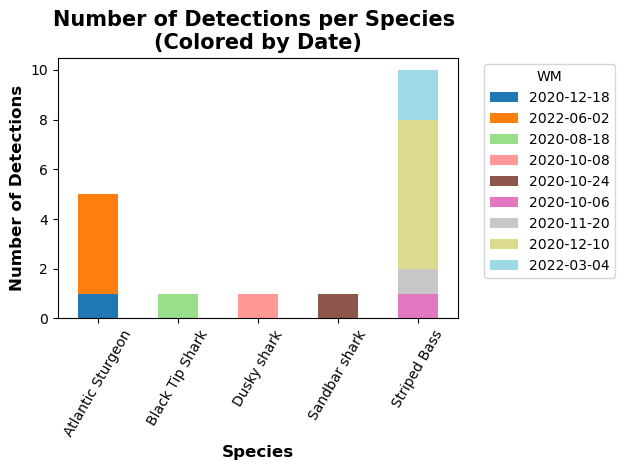

In [14]:
# Counts occurrences of data for each combination of 'Species' and 'datecollected'
# organizing the results into a table where rows represent 'Species' and columns represent 'datecollected' categories
counts = combined_detection_data_reset.groupby(['Species', 'datecollected']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6)) 
# Create a histogram showing number of dettectons by species colored by the dates they were detected on
counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Number of Detections per Species \n(Colored by Date)', fontsize=15, fontweight='bold')
plt.xlabel('Species', fontsize=12, fontweight='bold')
plt.ylabel('Number of Detections', fontsize=12, fontweight='bold')
plt.xticks(rotation=60)
plt.legend(title='WM', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections per Species (Colored by Date).png', dpi=300)
plt.show()



<Figure size 1000x600 with 0 Axes>

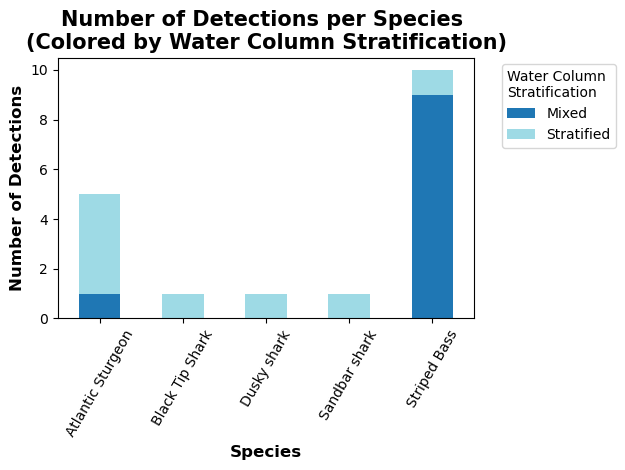

In [15]:
# Counts occurrences of data for each combination of 'Species' and 'Water_Column'
# organizing the results into a table where rows represent 'Species' and columns represent 'Water_Column' categories
counts = combined_detection_data_reset.groupby(['Species', 'Water_Column']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6)) 
# Create a stacked histogram that shows the number of detections by species bolored by whether the water column was stratified or mixed at the time of the detection
counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Number of Detections per Species \n(Colored by Water Column Stratification)', fontsize=15, fontweight='bold')
plt.xlabel('Species', fontsize=12, fontweight='bold')
plt.ylabel('Number of Detections', fontsize=12, fontweight='bold')
plt.xticks(rotation=60)
plt.legend(title='Water Column \nStratification', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Number of Detections per Species (Colored by Water Column Stratification).png', dpi=300)
plt.show()